In [1]:
import pandas as pd

In [2]:
rain = pd.read_parquet('data/rain_v2.parquet')

In [3]:
rain

,month,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,total,year
1,oct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,7,0,8,22,2006
2,nov,0,0,0,0,0,0,0,10,0,...,2,3,0,0,0,7,0,0,187,2006
3,dec,0,0,0,0,0,0,23,0,8,...,0,0,0,0,0,0,0,0,78,2006
5,jan,0,0,0,0,0,0,2,0,0,...,0,0,9,0,0,0,0,0,18,2007
6,feb,0,0,0,0,0,0,0,23,0,...,0,3,0,0,0,0,0,0,32,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,sep,8,15,20,0,4,0,0,0,1,...,4,0,0,0,0,11,45,0,194,2022
226,oct,0,0,0,19,0,18,3,4,29,...,7,0,0,24,0,0,0,0,178,2022
227,nov,0,12,4,0,0,9,5,0,0,...,0,0,0,0,0,0,0,0,127,2022
228,dec,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,4,2022


I already know that it's stationary. 

Do I want to train/predict on daily rainfall totals? Or should I go to monthly?

I want to make a new date column that is all of these things.

In [4]:
rain

,month,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,total,year
1,oct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,7,0,8,22,2006
2,nov,0,0,0,0,0,0,0,10,0,...,2,3,0,0,0,7,0,0,187,2006
3,dec,0,0,0,0,0,0,23,0,8,...,0,0,0,0,0,0,0,0,78,2006
5,jan,0,0,0,0,0,0,2,0,0,...,0,0,9,0,0,0,0,0,18,2007
6,feb,0,0,0,0,0,0,0,23,0,...,0,3,0,0,0,0,0,0,32,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,sep,8,15,20,0,4,0,0,0,1,...,4,0,0,0,0,11,45,0,194,2022
226,oct,0,0,0,19,0,18,3,4,29,...,7,0,0,24,0,0,0,0,178,2022
227,nov,0,12,4,0,0,9,5,0,0,...,0,0,0,0,0,0,0,0,127,2022
228,dec,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,4,2022


In [5]:
df = pd.DataFrame(data=0, index=pd.date_range(start='oct/1/2006', end='jan/31/2023'), columns=['rain'])

In [6]:
df.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', length=5967)

In [7]:
df.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', length=5967)

In [8]:
df.index.month.astype

<bound method Index.astype of Int64Index([10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
           dtype='int64', length=5967)>

In [9]:
rain.month[1] == df.index.month[0]

False

In [10]:
df['month'] = df.index.month.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [11]:
df['year'] = df.index.year

In [12]:
rain.month[1] == df.month[0]

True

In [15]:
rain.month

1      oct
2      nov
3      dec
5      jan
6      feb
      ... 
225    sep
226    oct
227    nov
228    dec
231    jan
Name: month, Length: 196, dtype: category
Categories (12, object): ['jan', 'feb', 'mar', 'apr', ..., 'sep', 'oct', 'nov', 'dec']

In [20]:
rain.query("month == 'oct' & year == 2006")

,month,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,total,year
1,oct,0,0,0,0,0,0,0,0,0,...,0,0,0,0,7,7,0,8,22,2006


In [45]:
df.index[0].day

1

In [70]:
for date in df.index:
    df.loc[date, 'rain'] = rain.loc[(rain.month == df.loc[date, 'month']) & (rain.year == df.loc[date, 'year']), [str(date.day)]].values[0][0] # (rain.month == date.month) & (rain.year == date.year)

In [71]:
df

,rain,month,year
2006-10-01,0,oct,2006
2006-10-02,0,oct,2006
2006-10-03,0,oct,2006
2006-10-04,0,oct,2006
2006-10-05,0,oct,2006
...,...,...,...
2023-01-27,0,jan,2023
2023-01-28,0,jan,2023
2023-01-29,0,jan,2023
2023-01-30,0,jan,2023


In [80]:
df.loc['2022-03-01':'2022-03-30', 'rain'].sum()

130

In [81]:
df.rain.max()

104

<AxesSubplot: >

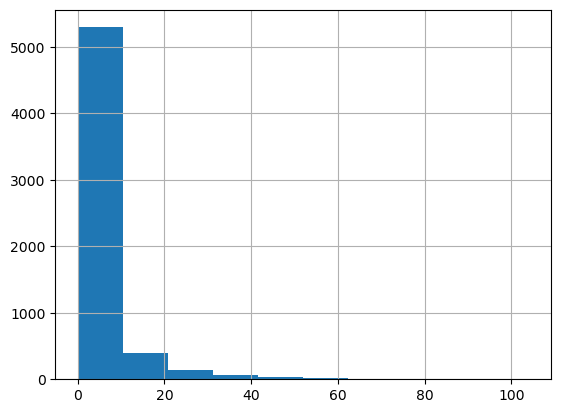

In [75]:
df.rain.hist()

In [83]:
df = df.drop(['month', 'year'], axis=1)

In [84]:
df.to_parquet('data/rain_time_series.parquet')